# Joins

> Udviklet af Thomas Lange & Mick Ahlmann Brun

Mere info: [https://github.com/M1ckB/T-SQL](https://github.com/M1ckB/T-SQL)

Version 1.0 2023-01-08

Laboratoriet kræver:

- En understøttet version af SQL Server
- En Stack Overflow database: [Brent Ozar](https://www.BrentOzar.com/go/querystack) (medium)

Læs mere om joins i Microsofts T-SQL reference:

- [https://learn.microsoft.com/en-us/sql/t-sql/queries/from-transact-sql?view=sql-server-ver16](https://learn.microsoft.com/en-us/sql/t-sql/queries/from-transact-sql?view=sql-server-ver16)

## Indholdsfortegnelse

- [JOIN-tabeloperatoren](#JOIN-tabeloperatoren)
- [Typer af joins](#Typer-af-joins)
    - [CROSS-join](#CROSS-join)
    - [INNER-join](#INNER-join)
    - [OUTER-joins](#OUTER-joins)
    - [Flere eksempler med joins](#Flere-eksempler-med-joins)
- [Hovedpointer](#Hovedpointer)

## `JOIN`-tabeloperatoren

`FROM`-delsætningen er det første som logisk processeres i en forespørgsel. I `FROM`-delsætningen beskrives den eller de tabeller som der skal læses fra i en forespørgsel.

Når der skal læses fra flere tabeller, så skal det specificeres hvordan disse hænger sammen. Dette gøres via tabeloperatorer.

`JOIN`-tabeloperatoren tager to tabeller som input, udfører nogle logiske processeringsfaser og returnerer en tabel som resultat.

Use cases:

- Når oplysninger fra to eller flere tabeller skal kædes sammen


In [ ]:
/*  Nedenstående er et eksempel på brug af JOIN-tabeloperatoren */

CREATE TABLE #TableA (
  Id int NOT NULL,
  TableB_Id int NOT NULL
);

INSERT INTO #TableA (Id, TableB_Id)
VALUES
(1, 5), 
(2, 6);

CREATE TABLE #TableB (
  Id int NOT NULL,
  Col nvarchar(100) NULL
);

INSERT INTO #TableB (Id, Col)
VALUES
(5, 'Info from table B');

SELECT * FROM #TableA;
SELECT * FROM #TableB;

SELECT
  a.Id,
  a.TableB_Id,
  b.Col
FROM #TableA AS a
JOIN #TableB AS b ON b.Id = a.TableB_Id;

DROP TABLE #TableA;
DROP TABLE #TableB;

## Typer af joins

Der findes forskellige typer af joins, henholdsvis `CROSS`-join, `INNER`-join og `OUTER`-joins.

Hver type af join benytter sig af nogle logiske faser: *Kartesisk Produkt*, *Filter* og *Tilføj Ydre Rækker*.

De forskellige typer af joins og deres faser vil gennemgås nedenfor.

### `CROSS`\-join

Et `CROSS`\-join er den simpleste form for join.

Et `CROSS`\-join benytter kun en logisk fase: _Kartesisk Produkt_.

Tabeloperatoren tager to tabeller som input og matcher hver række i den ene tabel med alle rækker i den anden tabel.

Et `CROSS`\-join har formen:

```
SELECT
  <cols>
FROM <tableA>
CROSS JOIN <tableB>;

```

In [ ]:
/* Nedenstående er et eksempel på brug af CROSS-join */

/* I eksemplet bliver år dubleret svarende til antallet af måneder */

CREATE TABLE #TableA (
  [Year] int NOT NULL
);

INSERT INTO #TableA ([Year])
VALUES
(2020), (2021), (2022);

CREATE TABLE #TableB (
  [Month] int NOT NULL,
  MonthName nvarchar(100) NOT NULL
);

INSERT INTO #TableB ([Month], MonthName)
VALUES
(1, 'Jan'), (2, 'Feb'), (3, 'Mar'), (4, 'Apr'), (5, 'May'), (6, 'Jun'),
(7, 'Jul'), (8, 'Aug'), (9, 'Sep'), (10, 'Oct'), (11, 'Nov'), (12, 'Dec');

SELECT * FROM #TableA;
SELECT * FROM #TableB;

SELECT
  a.[Year],
  b.MonthName
FROM #TableA AS a
CROSS JOIN #TableB AS b
ORDER BY a.[Year], b.[Month];

DROP TABLE #TableA;
DROP TABLE #TableB;

#### *Tid til opgaver...*

Lav opgave 1 og 2 i [opgavehæftet](Joins.sql).


### `INNER`-join

Et `INNER`-join benytter to logiske faser: *Kartesisk Produkt* og *Filter*.

Tabeloperatoren tager to tabeller som input, laver et kartesisk produkt mellem disse (a la et `CROSS`-join) og filtrerer herefter rækkerne på baggrund af et prædikat som du angiver.

Et `INNER`-join har formen:

```sql
SELECT
  <cols>
FROM <tableA>
INNER JOIN <tableB>
  ON <join-condition>;
```

Dvs. at et `INNER`-join kun medtager rækker fra `tableA` som også er at finde i `tableB` jf. join-betingelsen. Dette kan også vises i et Venn-diagram:

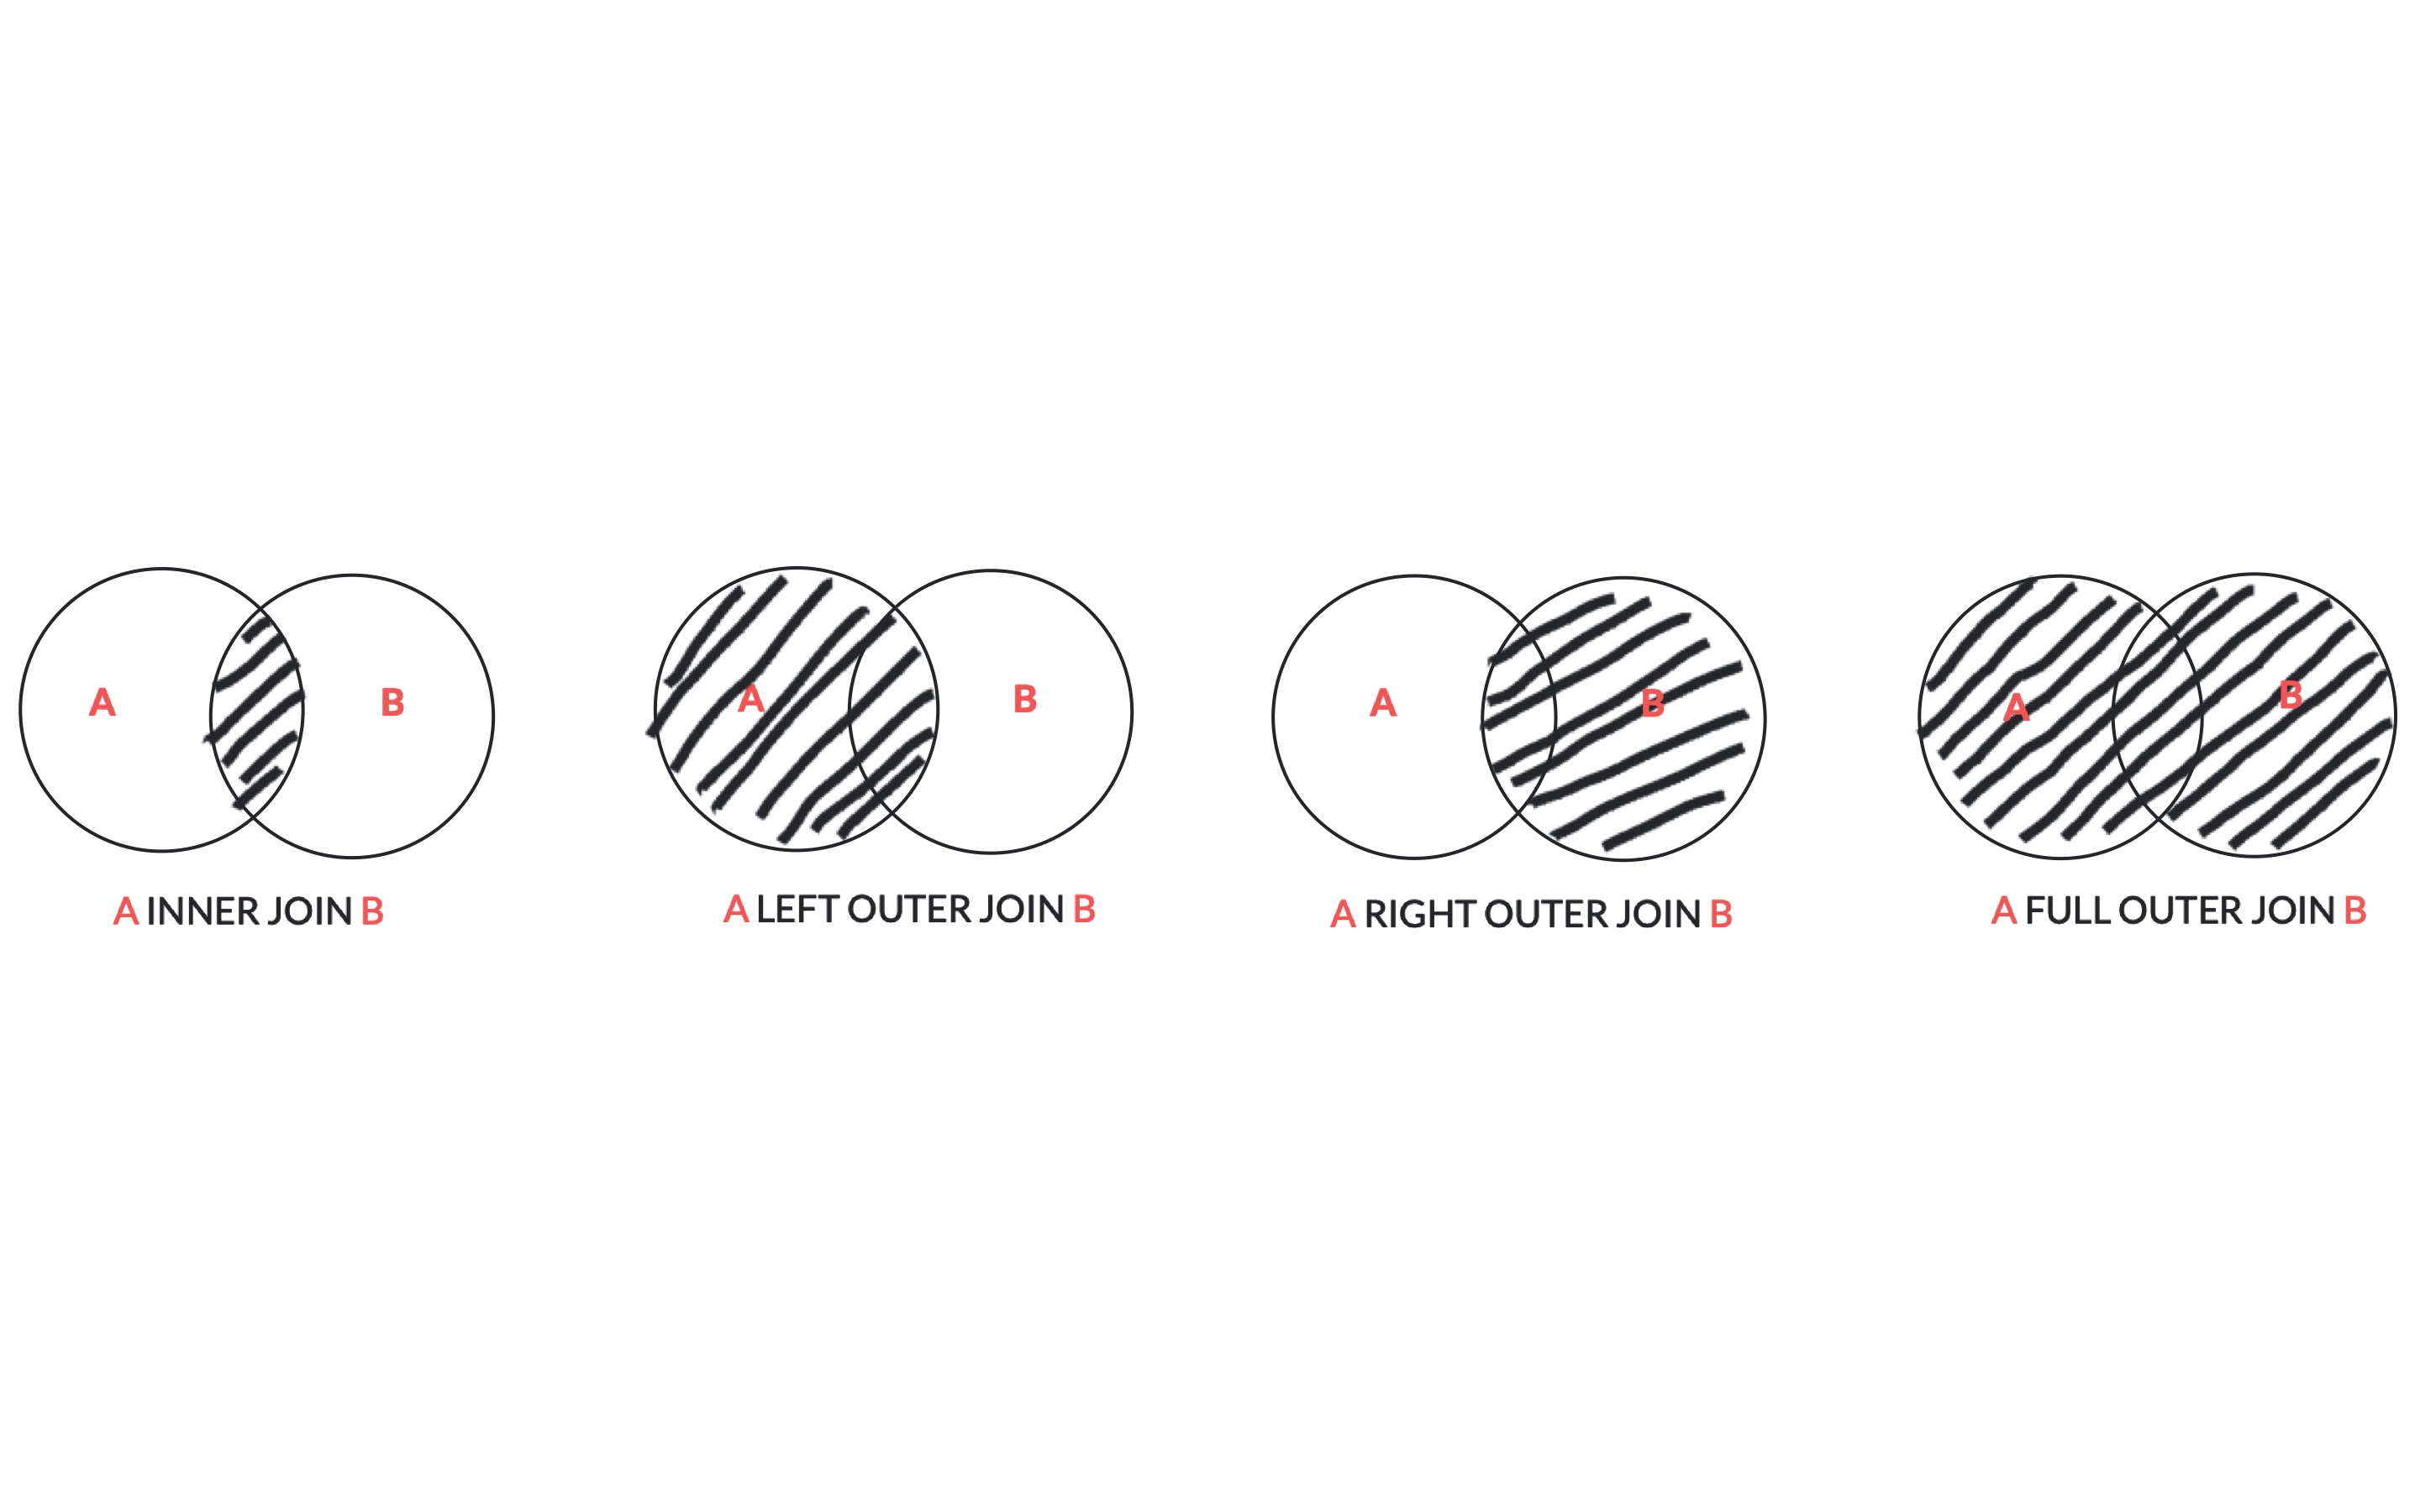


In [ ]:
/* Eksempel på brug af et INNER-join. */

/* I eksemplet medtages kun rækker fra tableA som også er at finde i tabelB jf. join-betingelsen */

CREATE TABLE #TableA (
  Id int NOT NULL,
  TableB_Id int NULL
);

INSERT INTO #TableA (Id, TableB_Id)
VALUES
(1, NULL), (2, 3);

CREATE TABLE #TableB (
  Id int NOT NULL,
  Col nvarchar(100) NULL
);

INSERT INTO #TableB (Id, Col)
VALUES
(1, 'ABC'), (2, 'DEF'), (3, 'GHI');

SELECT * FROM #TableA;
SELECT * FROM #TableB;

SELECT
  a.Id,
  a.TableB_Id,
  b.Col
FROM #TableA AS a
INNER JOIN #TableB AS b ON b.Id = a.TableB_Id;

DROP TABLE #TableA;
DROP TABLE #TableB;


#### _Tid til opgaver..._

Lav opgave 3, 4, 5 og 6 i [opgavehæftet](./Joins.sql).

### `OUTER`\-joins

Et `OUTER`\-join benytter alle tre logiske faser: _Kartesisk Produkt_, _Filter_ og _Tilføj Ydre Rækker_.

Tabeloperatoren tager to tabeller som input, laver et kartesisk produkt mellem disse, filtrerer rækkerne på baggrund af et prædikat som du angiver (a la et `INNER`\-join) og tilføjer herefter rækker fra den tabel der er markeret som "bevaret".

Hvilken tabel der er "bevaret" styres af nøgleordene: `LEFT`, `RIGHT` og `FULL`.

Et `OUTER`\-join har en af følgende former:

```
SELECT
  <cols>
FROM <table1>
LEFT OUTER JOIN <table2>
  ON <join-condition>;

```
```
SELECT
  <cols>
FROM <table1>
RIGHT OUTER JOIN <table2>
  ON <join-condition>;

```
```
SELECT
  <cols>
FROM <table1>
FULL OUTER JOIN <table2>
  ON <join-condition>;

```

De tre forskellige `OUTER`\-joins kan også illustreres i et Venn-diagram:

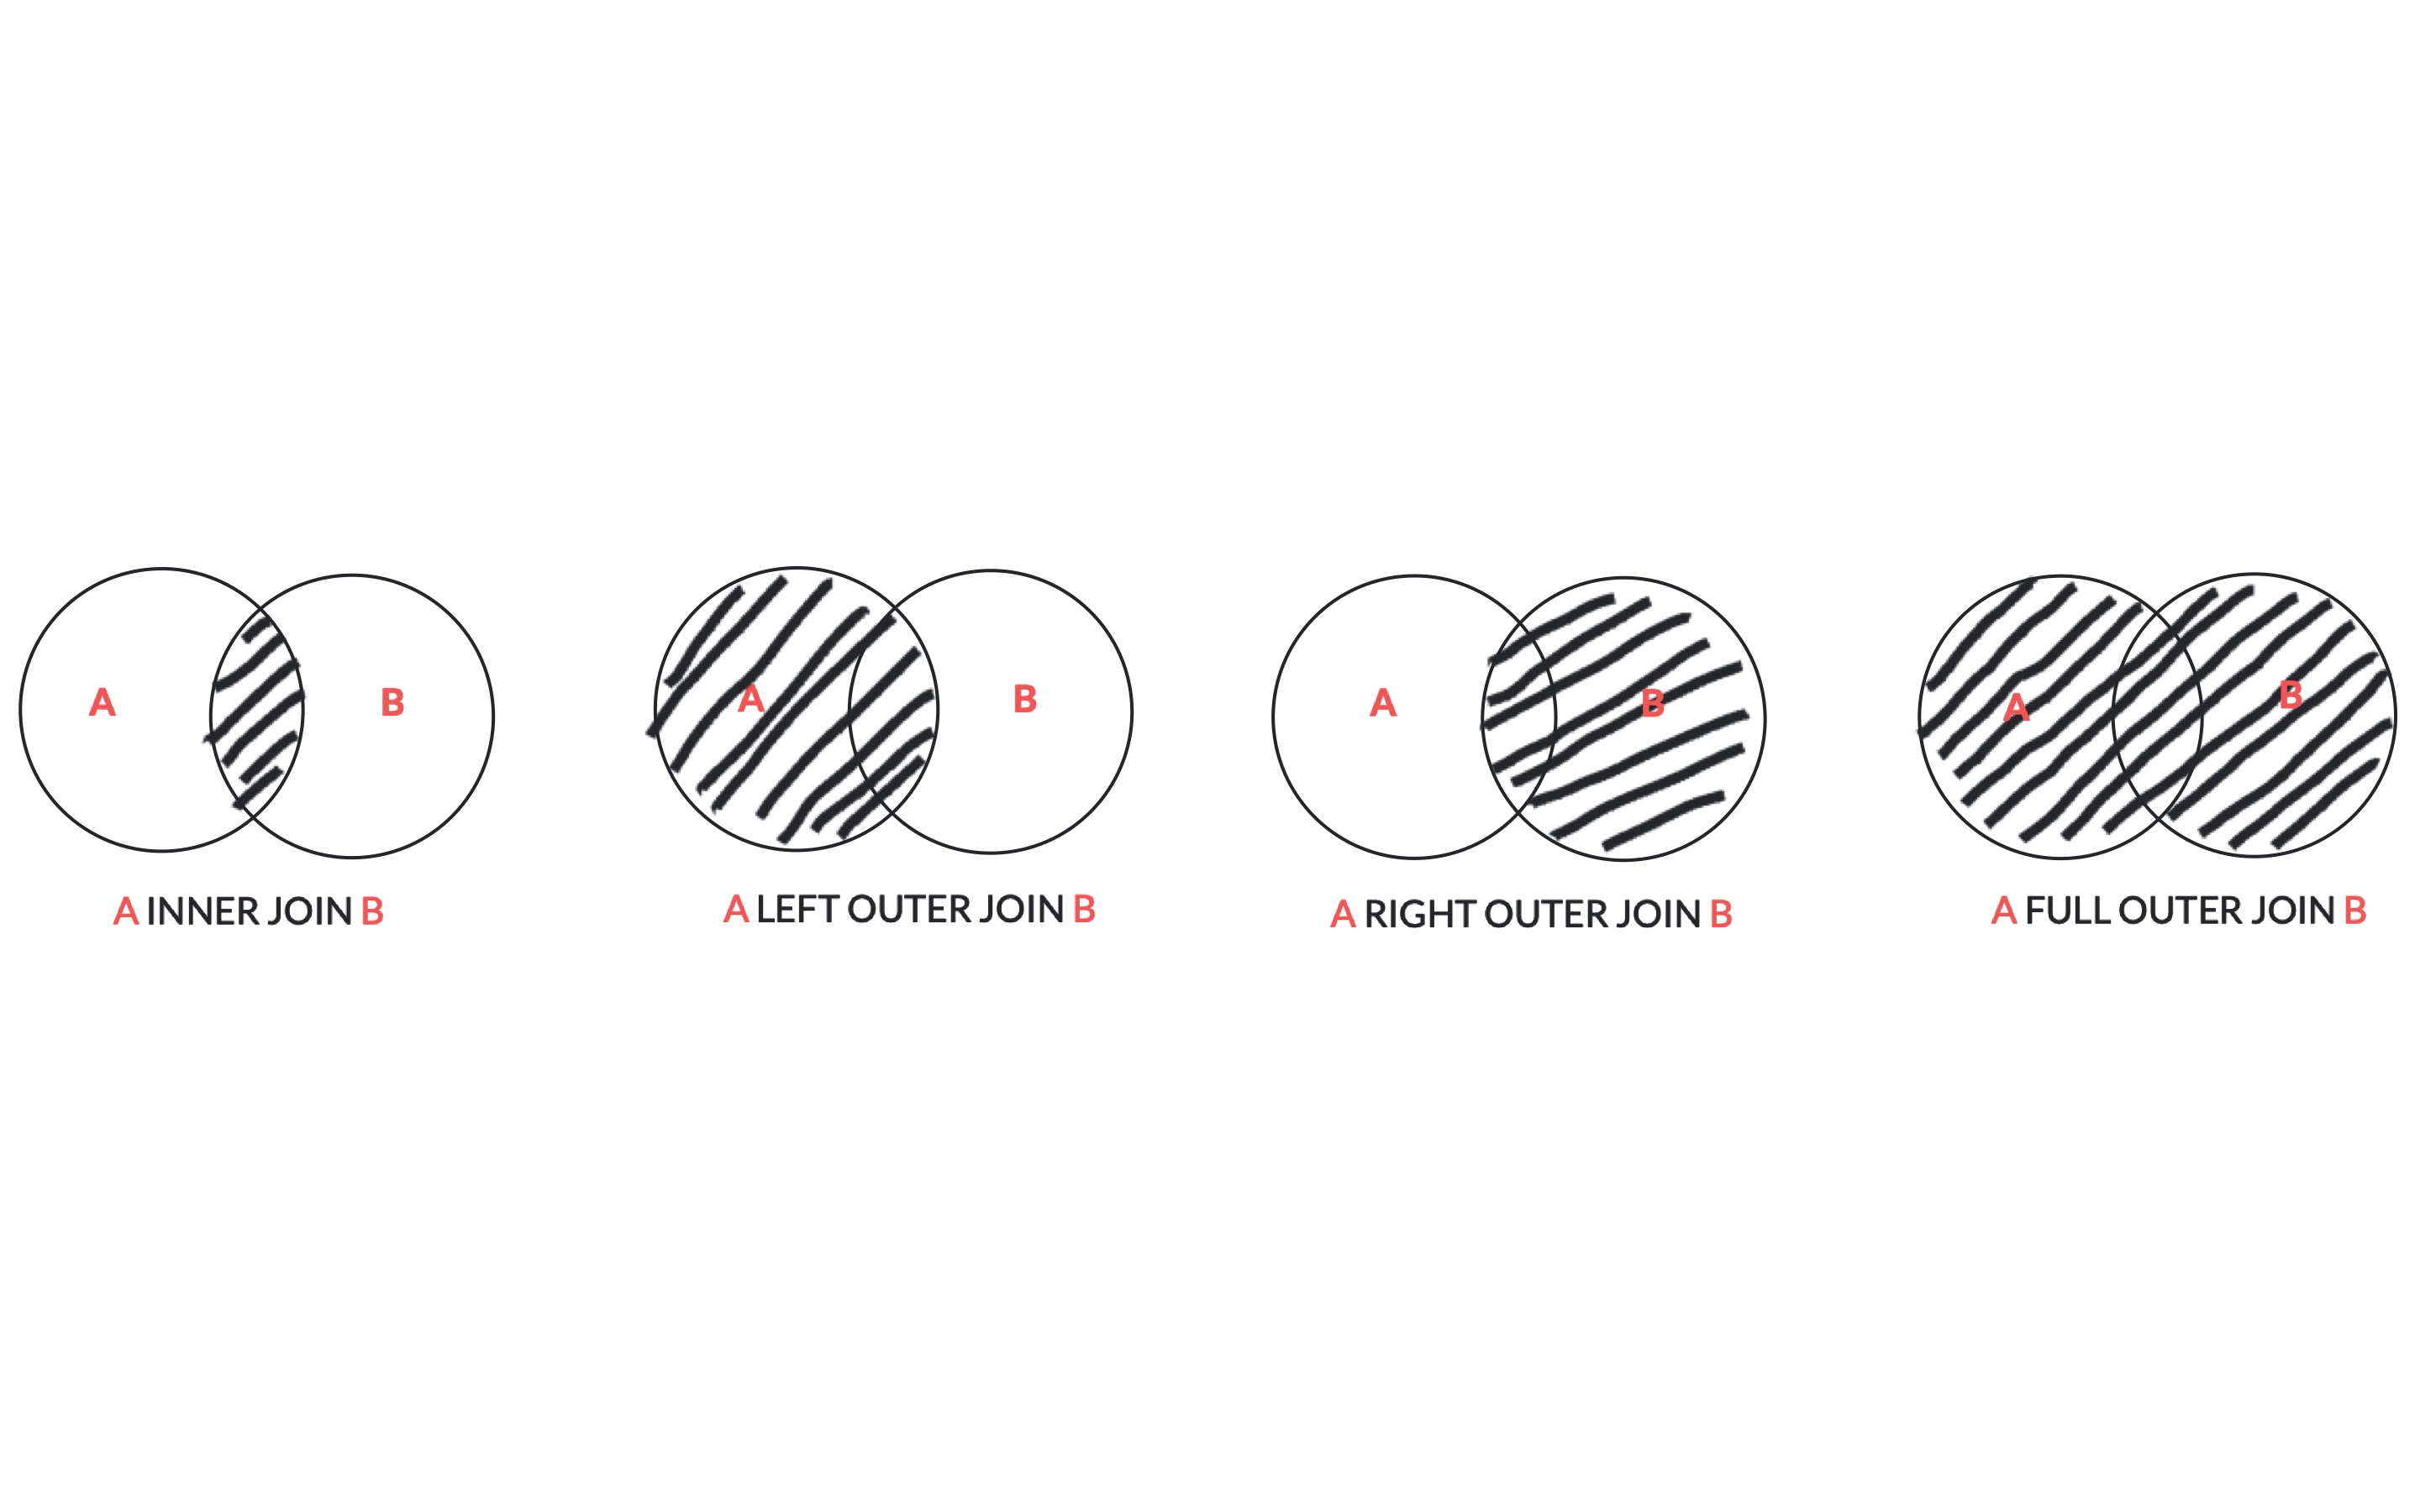

In [ ]:

/* Eksempel på brug af OUTER-joins */

/* I det første eksempel ses hvordan et OUTER-join, modsat et INNER-join, bevarer rækker fra
tableA uagtet om der eksisterer en matchende række i tableB */


CREATE TABLE #TableA (
  Id int NOT NULL,
  TableB_Id int NULL
);

INSERT INTO #TableA (Id, TableB_Id)
VALUES
(1, NULL), (2, 3);

CREATE TABLE #TableB (
  Id int NOT NULL,
  Col nvarchar(100) NULL
);

INSERT INTO #TableB (Id, Col)
VALUES
(1, 'ABC'), (2, 'DEF'), (3, 'GHI');

SELECT * FROM #TableA;
SELECT * FROM #TableB;

SELECT
  a.Id,
  a.TableB_Id,
  b.Col
FROM #TableA AS a
LEFT OUTER JOIN #TableB AS b ON b.Id = a.TableB_Id;
--FROM #TableB AS b
--RIGHT JOIN #TableA AS a ON b.Id = a.TableB_Id;

/* Bemærk at nøgleordet OUTER er valgfrit */

/* I det andet eksempel ses hvordan rækker fra både tableA og tableAA bevares */

CREATE TABLE #TableAA (
  Id int NOT NULL,
  TableB_Id int NULL
);

INSERT INTO #TableAA (Id, TableB_Id)
VALUES
(1, 2), (3, 1);

SELECT * FROM #TableA;
SELECT * FROM #TableAA;

SELECT
    COALESCE(a.Id, aa.Id) AS Id,
    COALESCE(a.TableB_Id, aa.TableB_Id) AS TableB_Id
FROM #TableA AS a
FULL OUTER JOIN #TableAA AS aa ON aa.Id = a.Id;

DROP TABLE #TableA;
DROP TABLE #TableB;
DROP TABLE #TableAA;

#### *Tid til opgaver...*

Lav opgave 7 og 8 i [opgavehæftet](Joins.sql).


### Flere eksempler med joins

Indtil videre har vi kun set simple joins, dvs. joins med to tabeller og en enkelt matching-attribut.

Virkeligheden byder ofte på forespørgsler med mange tabeller, flere matching-attributter og brug af både ligheds- og ulighedstegn.

Nedenfor er et par eksempler på dette.


In [ ]:
/* Nedenfor er et eksempel på et join med flere matching-attributter, også kaldt et
composite join */

CREATE TABLE #TableA (
  Id int NOT NULL,
  TableB_Id int NULL
);

INSERT INTO #TableA (Id, TableB_Id)
VALUES
(1, NULL), (2, 3), (3, 1);

CREATE TABLE #TableB (
  Id int NOT NULL,
  Col1 nvarchar(100) NULL,
  Col2 date NULL
);

INSERT INTO #TableB (Id, Col1, Col2)
VALUES
(1, 'ABC', '19380101'), (2, 'DEF', '20120312'), (3, 'GHI', '20200521');

SELECT * FROM #TableA;
SELECT * FROM #TableB;

SELECT
  a.Id,
  a.TableB_Id,
  b.Col1,
  b.Col2
FROM #TableA AS a
LEFT OUTER JOIN #TableB AS b ON b.Id = a.TableB_Id AND b.Col2 > CAST('20000101' AS date);

DROP TABLE #TableA;
DROP TABLE #TableB;

In [ ]:
/* Nedenfor er et eksempel på joins med flere tabeller, også kaldt multi-join queries */

/* Bemærk at at multi-join queries evalueres fra venstre mod højre! Dette er modsat konceptet om
all-at-once operations som gør sig gældende ellers. Dette er særlig vigtigt når der arbejdes med
OUTER joins da resultatet fra den første tabeloperator også leverer "ydre rækker" til den næste
tabeloperator */

CREATE TABLE #TableA (
  Id int NOT NULL,
  TableB_Id int NULL
);

INSERT INTO #TableA (Id, TableB_Id)
VALUES
(1, NULL), (2, 3), (3, 1);

CREATE TABLE #TableB (
  Id int NOT NULL,
  ColB nvarchar(100) NULL,
  TableC_Id int NULL
);

INSERT INTO #TableB (Id, ColB, TableC_Id)
VALUES
(1, 'ABC', 3), (2, 'DEF', 1), (3, 'GHI', 2);

CREATE TABLE #TableC (
  Id int NOT NULL,
  ColC date NULL
);

INSERT INTO #TableC (Id, ColC)
VALUES
(1, '20201231'), (2, '19250102'), (3, '20500304');

SELECT * FROM #TableA;
SELECT * FROM #TableB;
SELECT * FROM #TableC;

SELECT
  a.Id,
  a.TableB_Id,
  b.ColB,
  b.TableC_Id,
  c.ColC
FROM #TableA AS a
LEFT OUTER JOIN #TableB AS b ON b.Id = a.TableB_Id
LEFT OUTER JOIN #TableC AS c ON c.Id = b.TableC_Id;
-- INNER JOIN #TableC AS c ON c.Id = b.TableC_Id;

DROP TABLE #TableA;
DROP TABLE #TableB;
DROP TABLE #TableC;


## Hovedpointer

- `JOIN` er en tabeloperator som fungerer i `FROM`-delsætningen. Tabeloperatoren tager imod nogle inputtabeller, udfører nogle logiske faser og returnerer en resultattabel
- `JOIN`-operatoren har følgende logiske faser: Kartesisk Produkt, Filter og Tilføj Ydre Rækker
- Der er tre typer af joins: `CROSS` join, `INNER` joins og `OUTER` joins
- De tre typer af joins benytter følgende logiske faser:
  - `CROSS` join:   Kartesisk Produkt
  - `INNER` join:   Kartesisk Produkt og Filter
  - `OUTER` joins:  Kartesisk Produkt, Filter og Tilføj Ydre Rækker
- Når to tabeller joines, så kan der benyttes flere matching attributter i join-betingelsen (også kaldt
  *composite joins*)
- Når der er flere joins i en forespørgsel (også kaldt *multijoin queries*), så evalueres tabeloperatorerne
  fra venstre mod højre


## Licens

Creative Commons Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)

Mere info: [https://creativecommons.org/licenses/by-sa/4.0/](https://creativecommons.org/licenses/by-sa/4.0/)

Du kan frit:

- Dele: kopiere og distribuere materialet via ethvert medium og i ethvert format
- Tilpasse: remixe, redigere og bygge på materialet til ethvert formål, selv erhvervsmæssigt

Under følgende betingelser:

- Kreditering: Du skal kreditere, dele et link til licensen og indikere om der er lavet ændringer.
- Del på samme vilkår: Hvis du remixer, redigerer eller bygger på materialet, så skal dine bidrag
  distribueres under samme licens som den originale.
